# Algorithme des k plus proches voisins

On se propose ici d'écrire un algorithme dérivé de l'algorithme de tri par insertion dont le but est d'obtenir les k plus petits éléments d'une liste. On verra ensuite comment adapter et utiliser cet algorithme pour résoudre un problème de classification.

## Les k plus petits éléments d'une liste

### Question 1

Compléter la fonction suivante après avoir bien lu sa spécification dans la docstring. 

__Si vous n'y arrivez pas, vous pouvez ouvrir votre cours au chapitre qui traite des tris et consulter le paragraphe sur le tri par insertion.__

In [3]:
def insertion_croissante(L, x):
    """
    L est une liste de flottants qui est triée par ordre croissant et x est un flottant.
    Ajoute l'élément x à la liste L en l'insérant à sa place.
    """
    #
    #  Partie à compléter
    #
    #  N.B : Pas de return ici, la fonction ne fait que modifier la liste.

Tester votre fonction sur les quatres exemples ci-dessous : 


In [ ]:
L1 = [-1.2, 1, 2]
insertion_croissante(L1, 0.5)   # vérifie l'insertion sur un exemple générique
print(L1)
L2 = [-1.2, 1]
insertion_croissante(L2, 1.5)   # vérifie l'insertion à la fin
print(L2)
L3 = [-1.2, 1, ]
insertion_croissante(L3, -2.5)  # vérifie l'insertion au début
print(L3)
L4 = []
insertion_croissante(L4, 0.5)   # vérifie l'insertion sur la liste vide
print(L4)

### Question 2

Pour déterminer les k plus petits éléments de la liste L, on procède en deux temps :

1. On range un à un les k premiers éléments de L dans une nouvelle liste \\( \verb+plus+\_\verb+petits+ \\) (ce qui revient à faire un tri par insertion de cette partie de L).

2. On parcourt le reste de la liste et pour chaque élément x, on le compare avec le plus grand de la liste \\( \verb+plus+\_\verb+petits+ \\). Si x est plus petit, on retire le dernier élément de \\( \verb+plus+\_\verb+petits+ \\) et on y insère x à l'aide de \\( \verb+insertion+\_\verb+croissante+ \\).

Compléter le code de la fonction suivante en conséquence.

In [1]:
def k_plus_petits(L, k):
    """
    Renvoie la liste des k plus petits éléments de L
    """
    
    assert type(k) == int and k > 0, "k doit être un entier strictement positif"
    assert k <= len(L), "La liste ne contient pas assez d'éléments"
    
    
    plus_petits = []
    
    #
    #  Partie à compléter
    #
    #  Indication : il y a deux boucles à écrire
    
    return plus_petits

Tester votre code à l'aide de ce qui suit.

In [ ]:
from random import randint
L_alea = [randint(1,100) for k in range(20)]
print(L_alea)   # Affiche la liste aléatoire L  
print(k_plus_petits(L_alea, 4))    # Affiche les 4 plus petits éléments de L


## Les k plus proches voisins

L'algorithme des k plus proches voisins est essentiellement le même que celui qu'on vient d'écrire. Son intérêt réside dans son utilisation pour classifier des données en se basant sur la connaissance des classes pour un grand nombre d'autres données de même type. En cela il se range dans la famille des algorithmes d’apprentissage automatique (machine learning).

Examinons un exemple : Un botaniste a mesuré quatre éléments caractéristiques de 150 fleurs d'Iris dont 50 de chacune de trois espèces différentes (ce sont les classes qui nous intéressent ici).
Il a ainsi obtenu un ensemble de 150 enregistrements comportant pour chaque fleur : 

* la longueur des sépales (en cm)
* la largeur des sépales (en cm)
* la longueur des pétales (en cm)
* la largeur des pétales (en cm)
* l’espèce d’iris : Iris setosa, Iris virginica ou Iris versicolor


On ne peut pas représenter simmultanément quatre données numériques dans le plan mais, si on se restreint par exemple à la longueur des pétales en abscisse et la largeur en ordonnée, on obtiendrait l'ensemble des points suivants :

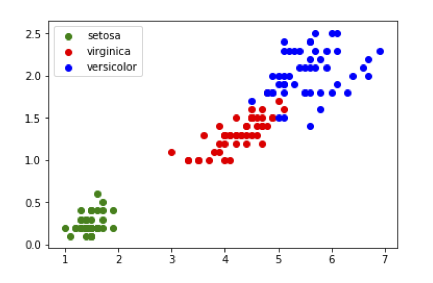


__Exécuter la cellule suivante__ pour importer les données dans une liste \\( \verb+BDIris+ \\) (base de données) comportant 150 éléments qui sont des tuples de 5 éléments sous la forme : 

(long_sep, larg_sep, long_pet, larg_pet, esp) 

où les quatre premiers éléments sont des flottants qui correspondent aux mesures et le cinquième est un entier entre 0 et 2 qui code l'espèce (0 pour Iris setosa, 1 pour Iris virginica et 2 pour Iris versicolor)

In [2]:
BDIris = [(5.1, 3.5, 1.4, 0.2, 0), (4.9, 3.0, 1.4, 0.2, 0), (4.7, 3.2, 1.3, 0.2, 0), (4.6, 3.1, 1.5, 0.2, 0), (5.0, 3.6, 1.4, 0.2, 0), (5.4, 3.9, 1.7, 0.4, 0), (4.6, 3.4, 1.4, 0.3, 0), (5.0, 3.4, 1.5, 0.2, 0), (4.4, 2.9, 1.4, 0.2, 0), (4.9, 3.1, 1.5, 0.1, 0), (5.4, 3.7, 1.5, 0.2, 0), (4.8, 3.4, 1.6, 0.2, 0), (4.8, 3.0, 1.4, 0.1, 0), (4.3, 3.0, 1.1, 0.1, 0), (5.8, 4.0, 1.2, 0.2, 0), (5.7, 4.4, 1.5, 0.4, 0), (5.4, 3.9, 1.3, 0.4, 0), (5.1, 3.5, 1.4, 0.3, 0), (5.7, 3.8, 1.7, 0.3, 0), (5.1, 3.8, 1.5, 0.3, 0), (5.4, 3.4, 1.7, 0.2, 0), (5.1, 3.7, 1.5, 0.4, 0), (4.6, 3.6, 1.0, 0.2, 0), (5.1, 3.3, 1.7, 0.5, 0), (4.8, 3.4, 1.9, 0.2, 0), (5.0, 3.0, 1.6, 0.2, 0), (5.0, 3.4, 1.6, 0.4, 0), (5.2, 3.5, 1.5, 0.2, 0), (5.2, 3.4, 1.4, 0.2, 0), (4.7, 3.2, 1.6, 0.2, 0), (4.8, 3.1, 1.6, 0.2, 0), (5.4, 3.4, 1.5, 0.4, 0), (5.2, 4.1, 1.5, 0.1, 0), (5.5, 4.2, 1.4, 0.2, 0), (4.9, 3.1, 1.5, 0.1, 0), (5.0, 3.2, 1.2, 0.2, 0), (5.5, 3.5, 1.3, 0.2, 0), (4.9, 3.1, 1.5, 0.1, 0), (4.4, 3.0, 1.3, 0.2, 0), (5.1, 3.4, 1.5, 0.2, 0), (5.0, 3.5, 1.3, 0.3, 0), (4.5, 2.3, 1.3, 0.3, 0), (4.4, 3.2, 1.3, 0.2, 0), (5.0, 3.5, 1.6, 0.6, 0), (5.1, 3.8, 1.9, 0.4, 0), (4.8, 3.0, 1.4, 0.3, 0), (5.1, 3.8, 1.6, 0.2, 0), (4.6, 3.2, 1.4, 0.2, 0), (5.3, 3.7, 1.5, 0.2, 0), (5.0, 3.3, 1.4, 0.2, 0), (7.0, 3.2, 4.7, 1.4, 2), (6.4, 3.2, 4.5, 1.5, 2), (6.9, 3.1, 4.9, 1.5, 2), (5.5, 2.3, 4.0, 1.3, 2), (6.5, 2.8, 4.6, 1.5, 2), (5.7, 2.8, 4.5, 1.3, 2), (6.3, 3.3, 4.7, 1.6, 2), (4.9, 2.4, 3.3, 1.0, 2), (6.6, 2.9, 4.6, 1.3, 2), (5.2, 2.7, 3.9, 1.4, 2), (5.0, 2.0, 3.5, 1.0, 2), (5.9, 3.0, 4.2, 1.5, 2), (6.0, 2.2, 4.0, 1.0, 2), (6.1, 2.9, 4.7, 1.4, 2), (5.6, 2.9, 3.6, 1.3, 2), (6.7, 3.1, 4.4, 1.4, 2), (5.6, 3.0, 4.5, 1.5, 2), (5.8, 2.7, 4.1, 1.0, 2), (6.2, 2.2, 4.5, 1.5, 2), (5.6, 2.5, 3.9, 1.1, 2), (5.9, 3.2, 4.8, 1.8, 2), (6.1, 2.8, 4.0, 1.3, 2), (6.3, 2.5, 4.9, 1.5, 2), (6.1, 2.8, 4.7, 1.2, 2), (6.4, 2.9, 4.3, 1.3, 2), (6.6, 3.0, 4.4, 1.4, 2), (6.8, 2.8, 4.8, 1.4, 2), (6.7, 3.0, 5.0, 1.7, 2), (6.0, 2.9, 4.5, 1.5, 2), (5.7, 2.6, 3.5, 1.0, 2), (5.5, 2.4, 3.8, 1.1, 2), (5.5, 2.4, 3.7, 1.0, 2), (5.8, 2.7, 3.9, 1.2, 2), (6.0, 2.7, 5.1, 1.6, 2), (5.4, 3.0, 4.5, 1.5, 2), (6.0, 3.4, 4.5, 1.6, 2), (6.7, 3.1, 4.7, 1.5, 2), (6.3, 2.3, 4.4, 1.3, 2), (5.6, 3.0, 4.1, 1.3, 2), (5.5, 2.5, 4.0, 1.3, 2), (5.5, 2.6, 4.4, 1.2, 2), (6.1, 3.0, 4.6, 1.4, 2), (5.8, 2.6, 4.0, 1.2, 2), (5.0, 2.3, 3.3, 1.0, 2), (5.6, 2.7, 4.2, 1.3, 2), (5.7, 3.0, 4.2, 1.2, 2), (5.7, 2.9, 4.2, 1.3, 2), (6.2, 2.9, 4.3, 1.3, 2), (5.1, 2.5, 3.0, 1.1, 2), (5.7, 2.8, 4.1, 1.3, 2), (6.3, 3.3, 6.0, 2.5, 1), (5.8, 2.7, 5.1, 1.9, 1), (7.1, 3.0, 5.9, 2.1, 1), (6.3, 2.9, 5.6, 1.8, 1), (6.5, 3.0, 5.8, 2.2, 1), (7.6, 3.0, 6.6, 2.1, 1), (4.9, 2.5, 4.5, 1.7, 1), (7.3, 2.9, 6.3, 1.8, 1), (6.7, 2.5, 5.8, 1.8, 1), (7.2, 3.6, 6.1, 2.5, 1), (6.5, 3.2, 5.1, 2.0, 1), (6.4, 2.7, 5.3, 1.9, 1), (6.8, 3.0, 5.5, 2.1, 1), (5.7, 2.5, 5.0, 2.0, 1), (5.8, 2.8, 5.1, 2.4, 1), (6.4, 3.2, 5.3, 2.3, 1), (6.5, 3.0, 5.5, 1.8, 1), (7.7, 3.8, 6.7, 2.2, 1), (7.7, 2.6, 6.9, 2.3, 1), (6.0, 2.2, 5.0, 1.5, 1), (6.9, 3.2, 5.7, 2.3, 1), (5.6, 2.8, 4.9, 2.0, 1), (7.7, 2.8, 6.7, 2.0, 1), (6.3, 2.7, 4.9, 1.8, 1), (6.7, 3.3, 5.7, 2.1, 1), (7.2, 3.2, 6.0, 1.8, 1), (6.2, 2.8, 4.8, 1.8, 1), (6.1, 3.0, 4.9, 1.8, 1), (6.4, 2.8, 5.6, 2.1, 1), (7.2, 3.0, 5.8, 1.6, 1), (7.4, 2.8, 6.1, 1.9, 1), (7.9, 3.8, 6.4, 2.0, 1), (6.4, 2.8, 5.6, 2.2, 1), (6.3, 2.8, 5.1, 1.5, 1), (6.1, 2.6, 5.6, 1.4, 1), (7.7, 3.0, 6.1, 2.3, 1), (6.3, 3.4, 5.6, 2.4, 1), (6.4, 3.1, 5.5, 1.8, 1), (6.0, 3.0, 4.8, 1.8, 1), (6.9, 3.1, 5.4, 2.1, 1), (6.7, 3.1, 5.6, 2.4, 1), (6.9, 3.1, 5.1, 2.3, 1), (5.8, 2.7, 5.1, 1.9, 1), (6.8, 3.2, 5.9, 2.3, 1), (6.7, 3.3, 5.7, 2.5, 1), (6.7, 3.0, 5.2, 2.3, 1), (6.3, 2.5, 5.0, 1.9, 1), (6.5, 3.0, 5.2, 2.0, 1), (6.2, 3.4, 5.4, 2.3, 1), (5.9, 3.0, 5.1, 1.8, 1)]


On va utiliser ces données pour essayer de déterminer à quelle espèce appartient une fleur connaissant les quatre mesures (longueur et largeur des sépales et pétales).
On considère une fleur dont on a les mesures mais pas l'espèce (code -1 pour l'espèce):

nouv_fleur = (long_sep, larg_sep, long_pet, larg_pet, -1)

Pour mesurer à quel point cette fleur ressemble à chacune des 150 de la base de données, on va utiliser une distance. Parmi les k plus proches de cette fleurs (c'est à dire les k plus petites distances à nouv_fleur), on va ensuite déterminer quelle est l'espèce la plus fréquente.
La fonction suivante calcule la distance entre deux fleurs. 

__Lire le code et exécuter la cellule.__

In [10]:
from math import sqrt
def distance(fleur_1, fleur_2):
    """Renvoie la distance entre les deux fleurs."""
    
    (x_1, y_1, z_1, t_1, esp1) = fleur_1
    (x_2, y_2, z_2, t_2, esp2) = fleur_2
    return sqrt((x_2 - x_1)**2 + (y_2 - y_1)**2 + (z_2 - z_1)**2 + (t_2 - t_1)**2)
    
    

### Question 3

Adapter la fonction \\( \verb+insertion+\_\verb+croissante+ \\) pour en déduire la fonction \\( \verb+insertion+\_\verb+fleur+ \\) en utilisant la fonction \\( \verb+distance+ \\) pour comparer les distances de deux fleurs avec nouv_fleur. 


In [11]:
def insertion_fleur(nouv_fleur, L, fleur):
    """
    nouv_fleur est la fleur de référence. L est une liste de fleurs qui est triée 
    par ordre croissant des distances à nouv_fleur.
    Ajoute fleur à la liste L en l'insérant à sa place pour la distance à nouv_fleur.
    """
    
    #
    #  Partie à compléter
    #

    

Pour tester votre code :

In [ ]:
f_b = (5, 3, 0, 0, 1)
f_1 = (6, 1, 0, 0, 0)
f_2 = (2, 3, 0, 0, 0)
f_3 = (3, 6, 0, 0, 0)
f_4 = (1, 5, 0, 0, 2)  # f_1, .. f_4 sont 4 fleurs placées à distance croissante de f_b
L1 = [f_1, f_3, f_4]; insertion_fleur(f_b, L1, f_2); 
print(L1)  # vérifie l'insertion sur un exemple générique
L2 = [f_1, f_2]; insertion_fleur(f_b, L2, f_4)
print(L2)   # vérifie l'insertion à la fin
L3 = [f_3, f_4]; insertion_fleur(f_b, L3, f_2)
print(L3)   # vérifie l'insertion au début
L4 = []; insertion_fleur(f_b, L4, f_2)
print(L4)   # vérifie l'insertion sur la liste vide

# On doit obtenir :
#[(6, 1, 0, 0, 0), (2, 3, 0, 0, 0), (3, 6, 0, 0, 0), (1, 5, 0, 0, 2)]
#[(6, 1, 0, 0, 0), (2, 3, 0, 0, 0), (1, 5, 0, 0, 2)]
#[(2, 3, 0, 0, 0), (3, 6, 0, 0, 0), (1, 5, 0, 0, 2)]
#[(2, 3, 0, 0, 0)]

### Question 4

Adapter la fonction \\( \verb+k+\_\verb+plus+\_\verb+petits+ \\) pour en déduire la fonction \\( \verb+k+\_\verb+NN+ \\) (de l'anglais k-nearest neighbors) à l'aide de la fonction \\( \verb+insertion+\_\verb+fleur+ \\). 
On utilisera la liste \\( \verb+BDIris+ \\) comme une variable globale.

 

In [ ]:
def k_NN(nouv_fleur, k):
    """
    Renvoie la liste de k fleurs les plus proches de nouv_fleur.
    """
    
    assert type(k) == int and 1 <= k <= 150, "k doit être un entier compris entre 1 et 150"
    
    plus_proches = []
    
    #
    #  Partie à compléter
    #
    
    return plus_proches

Pour tester votre code :

In [ ]:
k_NN((5,3,2,0.5,-1), 3) 
# Doit renvoyer [(5.1, 3.3, 1.7, 0.5, 0), (5.0, 3.0, 1.6, 0.2, 0), (4.8, 3.4, 1.9, 0.2, 0)]

### Question 5

Lire et compléter les codes des fonctions pour en déduire une fonction qui renvoie le code de l'espèce que la méthode des k plus proches voisins attribue à nouv_fleur.


In [ ]:
def indice_max(L):
    """
    L est une liste non vide d'entiers. Renvoie l'indice de la première occurence 
    du maximum de la liste.
    """
    
    #
    #  Partie à compléter. NB : Vu et revu dans le chapitre sur les listes.
    #
    
    
def prediction_espece(nouv_fleur, k):
    """
    Renvoie le code de l'espèce que la méthode des k plus proches voisins attribue 
    à nouv_fleur d'après les données de BDIris. Dans le cas d'égalité, n'importe 
    laquelle des réponses possibles est bonne.
    """
    
    plus_proches = k_NN(nouv_fleur, k)
    compteurs = [0,0,0]  # compteurs[i] va compter les fleurs d'espèce codée par i.

    #
    #  Partie à compléter. 
    #


    return indice_max(compteurs)
    

Pour tester votre code :
    

In [ ]:
print(prediction_espece((5,3,2,0.5,-1), 5))  # doit renvoyer 0
print(prediction_espece((5,3,5,2,-1), 5))    # doit renvoyer 1
print(prediction_espece((5,3,3,1,-1), 5))    # doit renvoyer 2